In [1]:
from mpmath import mpf, mp, pi
import gmpy2
from gmpy2 import mpz
import math 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
mp.dps = 16
%time actual_pi_val = mpf(pi)

CPU times: user 113 µs, sys: 41 µs, total: 154 µs
Wall time: 158 µs


In [3]:
#print(actual_pi_val)

In [4]:
twenty_by_seven_pi_val = 22/7
print(twenty_by_seven_pi_val)

3.142857142857143


In [5]:
rounded_pi_val = 3.14
print(rounded_pi_val)

3.14


In [6]:
total_num_sec_per_day = 24*60*60
print(total_num_sec_per_day)

86400


In [7]:
t = np.linspace(0,total_num_sec_per_day,total_num_sec_per_day-1)

In [8]:
print(t)

[0.00000000e+00 1.00002315e+00 2.00004630e+00 ... 8.63980000e+04
 8.63990000e+04 8.64000000e+04]


In [9]:
def myfunc(n):
    for i in range(n):
        yield 3.14 + (i/(total_num_sec_per_day*100))

In [10]:
a = np.full((1, total_num_sec_per_day-1), actual_pi_val)
b = np.full((1, total_num_sec_per_day-1), twenty_by_seven_pi_val)
c = np.full((1, total_num_sec_per_day-1), rounded_pi_val)
d = np.fromiter(myfunc(total_num_sec_per_day-1), dtype=float, count=total_num_sec_per_day-1)

In [11]:
#print(a)
#print(b)
#print(c)
#print(d)

In [12]:
#plt.plot(t, a, 'r', t, b, 'g', t, c, 'b', t, d, 'o')

In [13]:
diff_a = np.absolute(np.subtract(a, d))

In [14]:
diff_b = np.absolute(np.subtract(b, d))

In [15]:
diff_c = np.absolute(np.subtract(c, d))

In [16]:
diff_d = np.absolute(np.subtract(d, d))

In [17]:
#print(diff_a)
#print(diff_b)
#print(diff_c)
#print(diff_d)

/Users/benstewart/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  # Remove the CWD from sys.path while we load stuff.
/Users/benstewart/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


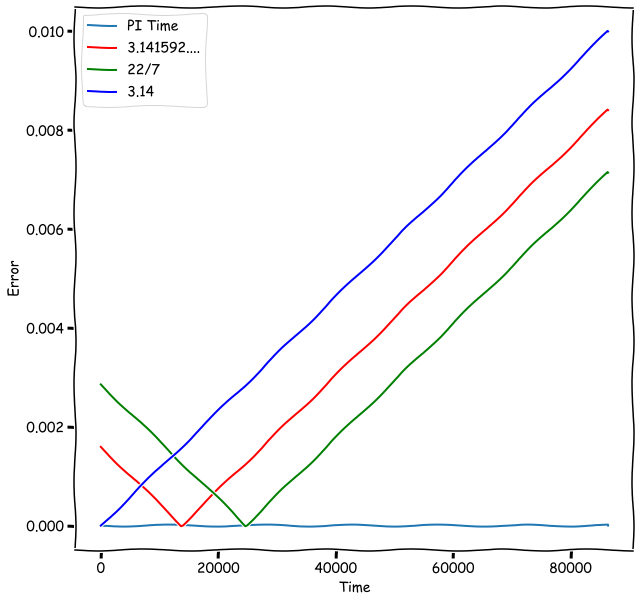

In [22]:
plt.xkcd()
plt.figure(figsize=(10,10))
l1, = plt.plot(t, diff_d, label='PI Time')
l2, = plt.plot(t, diff_a[0], 'r', label='3.141592....')
l3, = plt.plot(t, diff_b[0], 'g', label='22/7')
l4, = plt.plot(t, diff_c[0], 'b', label='3.14')
plt.xlabel("Time")
plt.ylabel("Error")
plt.legend(handles=[l1, l2, l3, l4])
plt.savefig('pi-graph.png',bbox_inches='tight')

In [19]:
rmse_a = mean_squared_error(diff_a[0], diff_d)
rmse_b = mean_squared_error(diff_b[0], diff_d)
rmse_c = mean_squared_error(diff_c[0], diff_d)
rmse_d = mean_squared_error(diff_d, diff_d)
print(rmse_a,rmse_b,rmse_c,rmse_d)

1.994236126704956e-05 1.2924481148443335e-05 3.3331983038087276e-05 0.0


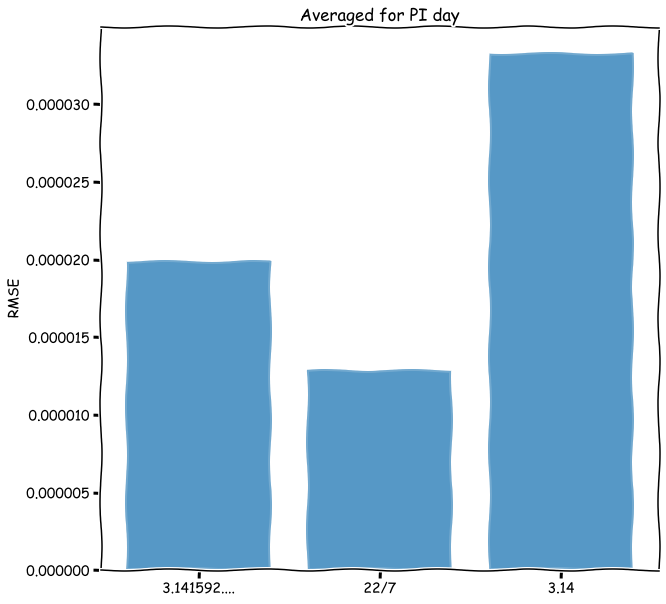

In [24]:
objects = ('3.141592....', '22/7', '3.14')
y_pos = np.arange(len(objects))
performance = [rmse_a,rmse_b,rmse_c]

plt.figure(figsize=(10,10))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('RMSE')
plt.title('Averaged for PI day')

plt.savefig('pi-graph-error.png',bbox_inches='tight')